In [1]:
!python --version

Python 3.10.11


In [2]:
from platform import python_version
print(python_version())

3.12.11


In [86]:
# Importing all libraries

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

import seaborn as sns
import matplotlib.pyplot as plt

import pickle

In [10]:
# Data Gathering
loan_df = pd.read_csv('Loan_Prediction.csv')
loan_df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


3. EDA -->
3.1 >> Missing value and outliers
3.2 >> Datatype
3.3 >> Corr
3.4 >> OneE and LE
3.5 >> Distribution >> Balanced, Imbalanced data, Skewed

In [11]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [12]:
loan_df.isna().sum() # missinmg values

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
loan_df.isna().sum()/len(loan_df) * 100 # percentage of missing values

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [14]:
loan_df.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP002990,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [15]:
# filling missing values

In [16]:
loan_df['Gender'] = loan_df['Gender'].fillna(loan_df['Gender'].mode()[0])

FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained
assignment using an inplace method. The behavior will change in pandas 3.0. This inplace method
will never work because the intermediate object on which we are setting values always behaves 
as a copy. For example, when doing 'df[col].method(value, inplace=True)', try using 
'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform
the operation inplace on the original object. `It means from now on inplace = True won't work`

`It means this:`  >>> `loan_df['Gender'].fillna(loan_df['Gender'].mode()[0], inplace = True)`
`is replced with:`>>> `loan_df['Gender'] = loan_df['Gender'].fillna(loan_df['Gender'].mode()[0])`

In [17]:
loan_df['Married'] = loan_df['Married'].fillna(loan_df['Married'].mode()[0])

In [18]:
loan_df['Dependents'] = loan_df['Dependents'].fillna(loan_df['Dependents'].mode()[0])

In [19]:
loan_df['Self_Employed'] = loan_df['Self_Employed'].fillna(loan_df['Self_Employed'].mode()[0])

In [20]:
loan_df['LoanAmount'] = loan_df['LoanAmount'].fillna(loan_df['LoanAmount'].mean())

In [21]:
loan_df['Loan_Amount_Term'] = loan_df['Loan_Amount_Term'].fillna(loan_df['Loan_Amount_Term'].mode()[0])

In [22]:
loan_df['Credit_History'] = loan_df['Credit_History'].fillna(loan_df['Credit_History'].mode()[0])

In [ ]:
### Need to change data types

In [24]:
loan_df['Gender'] = loan_df['Gender'].replace({'Male': 1, 'Female': 0})

FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained
assignment using an inplace method. The behavior will change in pandas 3.0. This inplace method
will never work because the intermediate object on which we are setting values always behaves
as a copy. For example, when doing 'df[col].method(value, inplace=True)', try using 
'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform 
the operation inplace on the original object.`It means from now on inplace = True won't work`
    `loan_df['Gender'].replace({'Male':1, 'Female':0}, inplace = True)`
Recommended: assign the result back
    `loan_df['Gender'] = loan_df['Gender'].replace({'Male': 1, 'Female': 0})`

FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future
version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To 
opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
    `loan_df['Gender'].replace({'Male':1, 'Female':0}, inplace = True)`
Option 1: Infer the correct dtype
    `loan_df['Gender']=loan_df['Gender'].replace({'Male':1,'Female':0}).infer_objects(copy=False)`
Option 2: Explicitly cast to int
    `loan_df['Gender'] = loan_df['Gender'].replace({'Male': 1, 'Female': 0}).astype(int)`
Option 3: Opt-in to new behavior globally. If you want to adopt the new behavior across your codebase:
    `import pandas as pd`
    `pd.set_option('future.no_silent_downcasting', True)`


In [25]:
loan_df['Married'].unique()

array(['No', 'Yes'], dtype=object)

In [26]:
loan_df['Married'] = loan_df['Married'].replace({'Yes':1, 'No':0})

C:\Users\Mayur\AppData\Local\Temp\ipykernel_26728\4279611479.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_df['Married'] = loan_df['Married'].replace({'Yes':1, 'No':0})


In [27]:
loan_df['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [28]:
loan_df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [29]:
loan_df['Education'] = loan_df['Education'].replace({'Graduate':1, 'Not Graduate':0})

C:\Users\Mayur\AppData\Local\Temp\ipykernel_26728\429969022.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_df['Education'] = loan_df['Education'].replace({'Graduate':1, 'Not Graduate':0})


In [30]:
loan_df['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [32]:
# Explicitly cast to int
loan_df['Self_Employed'] = loan_df['Self_Employed'].replace({'Yes':1, 'No':0}).astype(int)

C:\Users\Mayur\AppData\Local\Temp\ipykernel_26728\3612317469.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_df['Self_Employed'] = loan_df['Self_Employed'].replace({'Yes':1, 'No':0}).astype(int)


In [33]:
loan_df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [34]:
loan_df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [36]:
# explicitly cast to it didn't work so using Infer the correct dtype
loan_df['Loan_Status'] = loan_df['Loan_Status'].replace({'Y':1, 'N':0}).infer_objects(copy=False)

C:\Users\Mayur\AppData\Local\Temp\ipykernel_26728\4249702859.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_df['Loan_Status'] = loan_df['Loan_Status'].replace({'Y':1, 'N':0}).infer_objects(copy=False)


the warning may still appear because: The warning is triggered during the .replace() call, before
.astype() or .infer_objects() is applied. pandas is warning you that the intermediate result of
.replace() is still relying on deprecated downcasting behavior — even if you fix it afterward.
`Step 1: Ensure column is object (or string)
loan_df['Loan_Status'] = loan_df['Loan_Status'].astype(str)
Step 2: Replace with string values to avoid downcasting
loan_df['Loan_Status'] = loan_df['Loan_Status'].replace({'Y': '1', 'N': '0'})
Step 3: Convert to int explicitly
loan_df['Loan_Status'] = loan_df['Loan_Status'].astype(int)`

In [ ]:
# using LabelEncoder

In [39]:
le = LabelEncoder()
loan_df['Dependents'] = le.fit_transform(loan_df['Dependents'])
loan_df['Property_Area'] = le.fit_transform(loan_df['Property_Area'])

In [40]:
le.classes_

array(['Rural', 'Semiurban', 'Urban'], dtype=object)

In [41]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'Rural': np.int64(0), 'Semiurban': np.int64(1), 'Urban': np.int64(2)}


In [42]:
le.get_params([0, 1, 2])

{}

In [ ]:
### All the attributes are in Numeric state

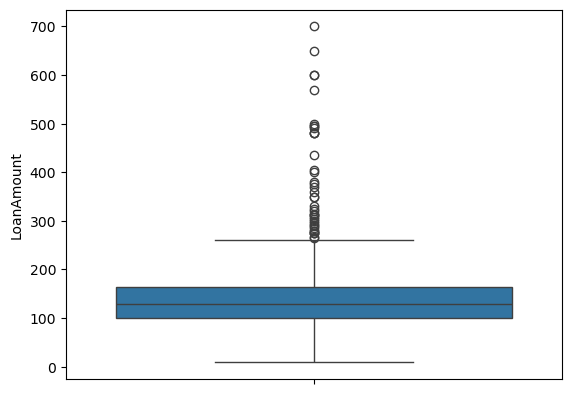

In [43]:
sns.boxplot(loan_df['LoanAmount']);

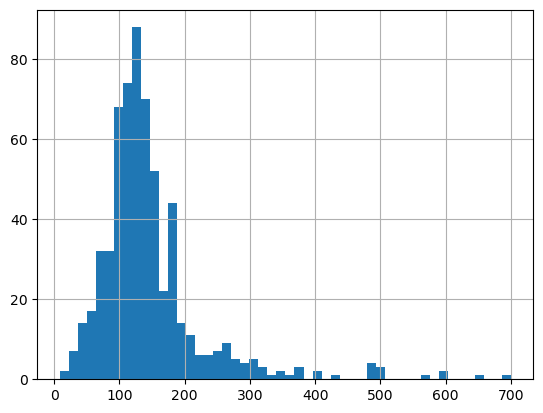

In [45]:
loan_df['LoanAmount'].hist(bins = 50);

In [ ]:
# data seems to be right skewed so we will try log transformation

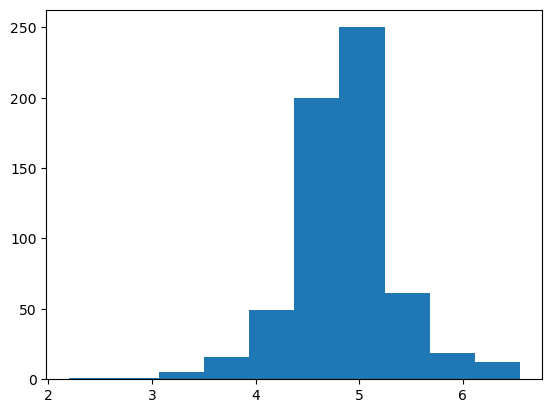

In [47]:
plt.hist(np.log(loan_df['LoanAmount']));

In [48]:
# this looks evenly distributed so we will finalize this
loan_df['log_LoanAmount'] = np.log(loan_df['LoanAmount'])

<Axes: xlabel='log_LoanAmount'>

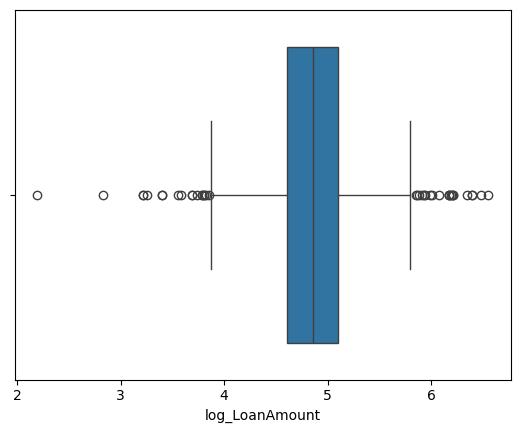

In [49]:
sns.boxplot(x = loan_df['log_LoanAmount'])

C:\Users\Mayur\AppData\Local\Temp\ipykernel_26728\3349737517.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan_df['log_LoanAmount'], kde = True)


<Axes: xlabel='log_LoanAmount', ylabel='Density'>

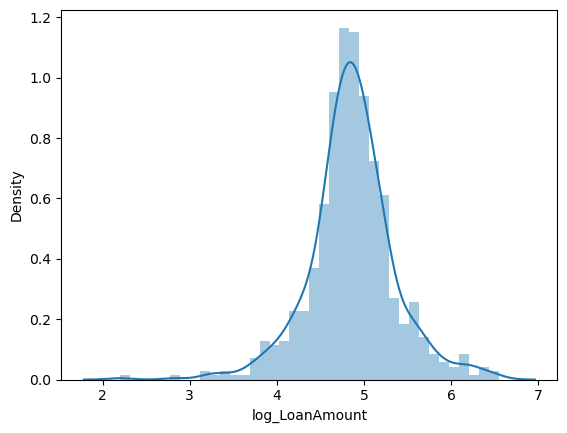

In [50]:
sns.distplot(loan_df['log_LoanAmount'], kde = True)

In [51]:
loan_df['TotalIncome'] = loan_df['ApplicantIncome'] + loan_df['CoapplicantIncome']

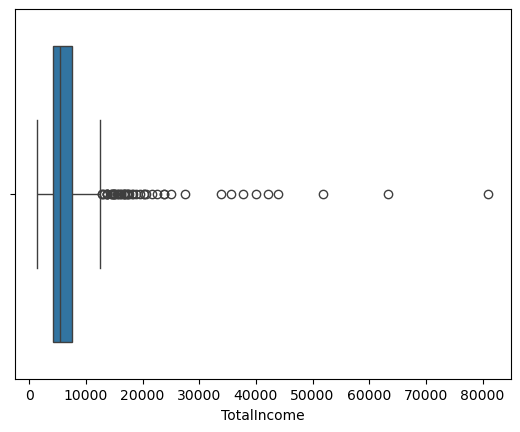

In [52]:
sns.boxplot(x = loan_df['TotalIncome']);

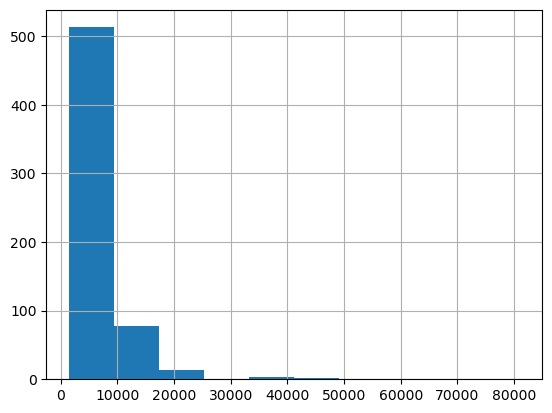

In [53]:
loan_df['TotalIncome'].hist();

In [54]:
loan_df['log_TotalIncome'] = np.log(loan_df['TotalIncome'])

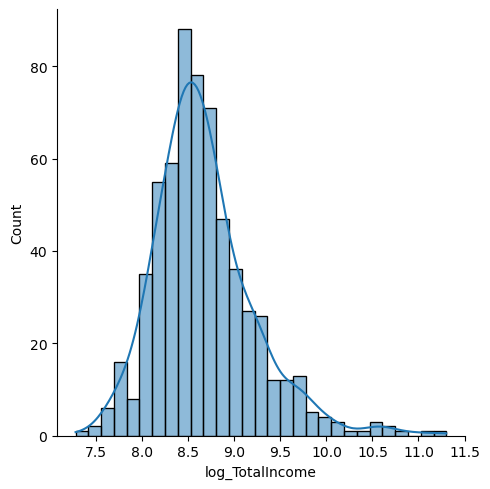

In [56]:
sns.displot(loan_df['log_TotalIncome'], kde = True);

In [57]:
loan_df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,log_LoanAmount,TotalIncome,log_TotalIncome
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1,4.986426,5849.0,8.674026
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0,4.852030,6091.0,8.714568
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1,4.189655,3000.0,8.006368


In [58]:
# Feature Selection 

In [59]:
loan_df.drop(['Loan_ID','ApplicantIncome','CoapplicantIncome','LoanAmount','TotalIncome'],
             axis = 1, inplace = True)

In [60]:
loan_df.sample(3)

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,log_LoanAmount,log_TotalIncome
582,0,1,0,1,0,360.0,1.0,1,1,3.583519,8.060224
392,1,1,0,1,0,360.0,1.0,2,1,4.787492,8.454892
388,1,1,0,1,0,360.0,1.0,2,1,4.912655,8.465900


In [62]:
# rearranging the columns
loan_df = loan_df[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'log_LoanAmount', 'log_TotalIncome','Loan_Status']]
loan_df.head(3)

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,log_LoanAmount,log_TotalIncome,Loan_Status
0,1,0,0,1,0,360.0,1.0,2,4.986426,8.674026,1
1,1,1,1,1,0,360.0,1.0,0,4.852030,8.714568,0
2,1,1,0,1,1,360.0,1.0,2,4.189655,8.006368,1


In [64]:
# splitting data
x = loan_df.drop(columns = ['Loan_Status'])
y = loan_df['Loan_Status']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 1, stratify=y)

#### Logistic Regression

In [68]:
# model training
logreg = LogisticRegression(max_iter = 500)
logreg.fit(x_train,y_train)

LogisticRegression(max_iter=500)

In [69]:
# model prediction

print("################# Testing ################")
y_pred_test = logreg.predict(x_test)

##### Evaluation Testing 

acc = accuracy_score(y_test,y_pred_test)
print(f"Accuracy Score = {acc}")
print(classification_report(y_test,y_pred_test))
print(confusion_matrix(y_test,y_pred_test))

##### Evaluation Training 
print("################# Training ################")
y_pred_train = logreg.predict(x_train)

acc = accuracy_score(y_train,y_pred_train)
print(f"Accuracy Score = {acc}")
print(classification_report(y_train,y_pred_train))
print(confusion_matrix(y_train,y_pred_train))

################# Testing ################
Accuracy Score = 0.8373983739837398
              precision    recall  f1-score   support

           0       1.00      0.47      0.64        38
           1       0.81      1.00      0.89        85

    accuracy                           0.84       123
   macro avg       0.90      0.74      0.77       123
weighted avg       0.87      0.84      0.82       123

[[18 20]
 [ 0 85]]
################# Training ################
Accuracy Score = 0.8024439918533605
              precision    recall  f1-score   support

           0       0.90      0.42      0.57       154
           1       0.79      0.98      0.87       337

    accuracy                           0.80       491
   macro avg       0.84      0.70      0.72       491
weighted avg       0.82      0.80      0.78       491

[[ 64  90]
 [  7 330]]


In [70]:
precision_logreg = precision_score(y_test,y_pred_test)
precision_logreg

0.8095238095238095

#### Decision tree

In [73]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(x_train,y_train)

y_pred_test_tree = tree_clf.predict(x_test)

##### Evaluation Testing 
print("################# Testing ################")
acc = accuracy_score(y_test,y_pred_test_tree)
print(f"Accuracy Score = {acc}")
print(classification_report(y_test,y_pred_test_tree))
print(confusion_matrix(y_test,y_pred_test_tree))

##### Evaluation Training 
print("################# Training ################")
y_pred_train = tree_clf.predict(x_train)

acc = accuracy_score(y_train,y_pred_train)
print(f"Accuracy Score = {acc}")
print(classification_report(y_train,y_pred_train))
print(confusion_matrix(y_train,y_pred_train))

################# Testing ################
Accuracy Score = 0.7398373983739838
              precision    recall  f1-score   support

           0       0.59      0.53      0.56        38
           1       0.80      0.84      0.82        85

    accuracy                           0.74       123
   macro avg       0.69      0.68      0.69       123
weighted avg       0.73      0.74      0.74       123

[[20 18]
 [14 71]]
################# Training ################
Accuracy Score = 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       154
           1       1.00      1.00      1.00       337

    accuracy                           1.00       491
   macro avg       1.00      1.00      1.00       491
weighted avg       1.00      1.00      1.00       491

[[154   0]
 [  0 337]]


In [74]:
precision_tree = precision_score(y_test, y_pred_test_tree)
print(precision_tree)

0.797752808988764


In [75]:
# model is overfitting and now we will try hyperparameter tuning

In [76]:
hyp = { 'criterion' : ['gini','entropy'],
        'max_depth' : np.arange(2,10),
        'min_samples_split' : np.arange(2,5),
        'min_samples_leaf' : np.arange(2,5)}

rscv_tree_clf  =  RandomizedSearchCV(tree_clf,hyp,cv=5)
rscv_tree_clf.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([2, 3, 4]),
                                        'min_samples_split': array([2, 3, 4])})

In [77]:
rscv_tree_clf.best_params_

{'min_samples_split': np.int64(2),
 'min_samples_leaf': np.int64(3),
 'max_depth': np.int64(2),
 'criterion': 'gini'}

In [78]:
y_pred_rscv_tree_clf = rscv_tree_clf.predict(x_test)
##### Evaluation Testing 
print("################# Testing ################")
acc = accuracy_score(y_test,y_pred_rscv_tree_clf)
print(f"Accuracy Score = {acc}")
print(classification_report(y_test,y_pred_rscv_tree_clf))
print(confusion_matrix(y_test,y_pred_rscv_tree_clf))


##### Evaluation Training 
print("################# Training ################")
y_pred_train = rscv_tree_clf.predict(x_train)

acc = accuracy_score(y_train,y_pred_train)
print(f"Accuracy Score = {acc}")
print(classification_report(y_train,y_pred_train))
print(confusion_matrix(y_train,y_pred_train))

################# Testing ################
Accuracy Score = 0.8373983739837398
              precision    recall  f1-score   support

           0       0.91      0.53      0.67        38
           1       0.82      0.98      0.89        85

    accuracy                           0.84       123
   macro avg       0.87      0.75      0.78       123
weighted avg       0.85      0.84      0.82       123

[[20 18]
 [ 2 83]]
################# Training ################
Accuracy Score = 0.8044806517311609
              precision    recall  f1-score   support

           0       0.85      0.45      0.59       154
           1       0.79      0.96      0.87       337

    accuracy                           0.80       491
   macro avg       0.82      0.71      0.73       491
weighted avg       0.81      0.80      0.78       491

[[ 70  84]
 [ 12 325]]


In [79]:
precision_tree_hyp = precision_score(y_test,y_pred_rscv_tree_clf)
precision_tree_hyp

0.8217821782178217

#### XGBoost

In [82]:
xgb = XGBClassifier(n_estimators = 10)
xgb.fit(x_train,y_train) # I encountered error importing xgboost si install it in env

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=10,
              n_jobs=None, num_parallel_tree=None, ...)

In [83]:
y_pred_xgb = xgb.predict(x_test)
##### Evaluation Testing 
print("################# Testing ################")
acc = accuracy_score(y_test,y_pred_xgb)
print(f"Accuracy Score = {acc}")
print(classification_report(y_test,y_pred_xgb))
print(confusion_matrix(y_test,y_pred_xgb))


##### Evaluation Training 
print("################# Training ################")
y_pred_train = xgb.predict(x_train)

acc = accuracy_score(y_train,y_pred_train)
print(f"Accuracy Score = {acc}")
print(classification_report(y_train,y_pred_train))
print(confusion_matrix(y_train,y_pred_train))

################# Testing ################
Accuracy Score = 0.8373983739837398
              precision    recall  f1-score   support

           0       0.85      0.58      0.69        38
           1       0.84      0.95      0.89        85

    accuracy                           0.84       123
   macro avg       0.84      0.77      0.79       123
weighted avg       0.84      0.84      0.83       123

[[22 16]
 [ 4 81]]
################# Training ################
Accuracy Score = 0.8778004073319755
              precision    recall  f1-score   support

           0       0.94      0.65      0.77       154
           1       0.86      0.98      0.92       337

    accuracy                           0.88       491
   macro avg       0.90      0.82      0.84       491
weighted avg       0.89      0.88      0.87       491

[[100  54]
 [  6 331]]


In [84]:
precision_xgb = precision_score(y_test,y_pred_xgb)
precision_xgb

0.8350515463917526

we can train more models like adaboost, random_forest etc and we haven't done preprocessing
that well so we should do tha like handling outliers and all so the accuracies might improve.
Also we are using precision_score because it measures the proportion of positively predicted
labels that are actually correct.

In [85]:
# compare all models
print('Logestic Regression :', precision_logreg)
print('Decision Tree :',precision_tree )
print('Decision Tree hyp :', precision_tree_hyp)
print('XGB classifier :', precision_xgb)

Logestic Regression : 0.8095238095238095
Decision Tree : 0.797752808988764
Decision Tree hyp : 0.8217821782178217
XGB classifier : 0.8350515463917526


In [87]:
# pickling of model with best precision_score (import pickle)
model = pickle.dump(xgb,open('model.pkl','wb'))

#### User test function

In [90]:
def prediction(user_input_data):

    result = xgb.predict([user_input_data])
    print(result)

In [88]:
user_input_data = x_test.iloc[7][::]
user_input_data # checking

Gender                1.000000
Married               1.000000
Dependents            1.000000
Education             1.000000
Self_Employed         0.000000
Loan_Amount_Term    360.000000
Credit_History        1.000000
Property_Area         2.000000
log_LoanAmount        3.401197
log_TotalIncome       7.993958
Name: 147, dtype: float64

In [91]:
result = prediction(user_input_data) # checking 
result

[1]


In [92]:
result = prediction(x_test.iloc[90][::]) # checking 
result

[0]
